In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.integrate import quad
from scipy.stats import gamma
import scipy.special as sc
from logger import Logger
from functions import *

Considering a simple circle graph with equal weight, we can simply choose any of the nodes as the source node by symmetry.

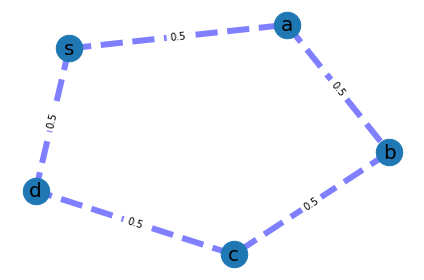

In [2]:
G = nx.Graph()
G.add_nodes_from(['s', 'a', 'b', 'c', 'd'])
G.add_edge('s', 'a', weight=0.5)
G.add_edge('a', 'b', weight=0.5)
G.add_edge('b', 'c', weight=0.5)
G.add_edge('c', 'd', weight=0.5)
G.add_edge('d', 's', weight=0.5)

draw_graph(G)

The source node by randomly choosing is c.
The most possible child is b
The parent canditates are ['c']
{'c': 1.0000000000000002}
The most possible child is d
The parent canditates are ['c']
{'c': 1.0000000000000002}
The most possible child is a
The parent canditates are ['b']
{'b': 1.080000000021779}
The most possible child is s
The parent canditates are ['a', 'd']
{'a': 0.6559556536706945, 'd': 0.6559556536706945}


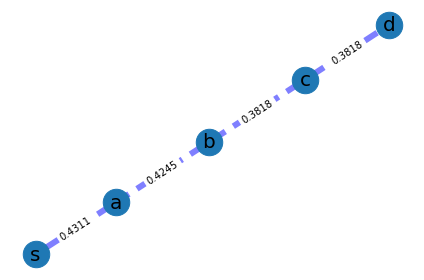

In [3]:
# Initialization 
s = np.random.choice(G.nodes()) # Randomly choose the source node for building the GGT. 
# s = 's'
print(f'The source node by randomly choosing is {s}.')
I = [s]
# Note the source here is not the same as that in rumor source detection.
# Initialize the Gamma dist parameter for the source node and calculate E and Var.
k_s = 1
theta_s = 1
E_s = k_s * theta_s
V_s = k_s * theta_s**2
# Build the GGT as T
T = nx.Graph()
T.add_node(s) # Add node s as the first parent node.
# Create a dictionary for storing the values related to each node.
k = {s:k_s}
theta = {s:theta_s}
E = {s:E_s}
V = {s:V_s}


while find_next_child(G, I) != None:
    moment_dict = {}
    moment2_dict = {}
    child = find_next_child(G, I)
    print(f'The most possible child is {child}')
    par_source = list(set(I) & set(G.neighbors(child)))
    print(f'The parent canditates are {par_source}')
    for par_ in find_parents(child, G, par_source):
        parents = find_parents(child, G, par_source)
        moment_dict[par_] = compute_moment(child, k, theta, 1, parents)
        moment2_dict[par_] = compute_moment(child, k, theta, 2, parents)
    print(moment_dict)
    par = min(moment_dict, key=moment_dict.get)
    k[child] =compute_k(E[par], V[par], G.get_edge_data(par, child)['weight'])
    theta[child] =compute_theta(E[par], V[par], G.get_edge_data(par, child)['weight'])
    E[child] = moment_dict[par]
    V[child] = moment2_dict[par] - moment_dict[par]**2
    I.append(child)
    T.add_edge(child, par, weight=round(compute_expectation(k[child], theta[child], k[par], theta[par]), 4))

draw_graph(T)

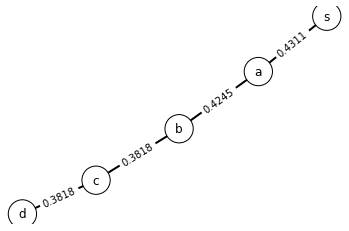

The most likely source nodes are: {'b'} 
 the corresponding likelyhood is 6.579553119475399 
 the index of the ovservation time correspond to node b  is  10


interactive(children=(IntSlider(value=1, description='index of the observation time', layout=Layout(width='500…

the darker the node color, the larger probability for the node to be the source


In [4]:
MP_weighted(T, T.nodes(), T_max=5, num_T_positions=10)